In [50]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
plt.style.use('fivethirtyeight')

In [51]:
data=pd.read_csv('airbnb.csv')
data=pd.DataFrame(data)

In [52]:
data.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [53]:
data.drop('borough',axis=1,inplace=True)

In [54]:
data.drop('survey_id',axis=1,inplace=True)

In [55]:
data.drop('minstay',axis=1,inplace=True)

In [56]:
data['price'].describe()

count    18723.000000
mean       166.599477
std        108.943849
min         12.000000
25%        108.000000
50%        144.000000
75%        192.000000
max       6000.000000
Name: price, dtype: float64

In [57]:
#dropping the bathroom column as it isnt populated

In [58]:
data.drop('bathrooms',axis=1,inplace=True)

In [59]:
#dropping the country column

In [60]:
data.drop('country',axis=1,inplace=True)

In [61]:
data['bedrooms'].value_counts()

1.0     11101
2.0      4456
3.0      1444
0.0      1154
4.0       473
5.0        62
6.0        19
10.0        5
7.0         4
8.0         3
9.0         2
Name: bedrooms, dtype: int64

In [62]:
#dropping rows with no bedroom

In [63]:
fff=data[data['bedrooms']==0].index
data.drop(fff,inplace=True)

In [64]:
data['bedrooms'].value_counts()

1.0     11101
2.0      4456
3.0      1444
4.0       473
5.0        62
6.0        19
10.0        5
7.0         4
8.0         3
9.0         2
Name: bedrooms, dtype: int64

In [65]:
data['overall_satisfaction'].value_counts()

5.0    7277
0.0    5406
4.5    4242
4.0     527
3.5      99
3.0      15
1.5       1
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

In [66]:
#replacing zero value with 4

In [67]:
data['overall_satisfaction'].replace(0,4,inplace=True)
data['overall_satisfaction'].value_counts()

5.0    7277
4.0    5933
4.5    4242
3.5      99
3.0      15
1.5       1
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

In [68]:
data['room_type'].value_counts()

Entire home/apt    14126
Private room        3380
Shared room           63
Name: room_type, dtype: int64

In [69]:
#comparing average prices of each room_type

In [70]:
df1=pd.pivot_table(data,index='room_type',values='price',aggfunc='mean')
df1

,price
room_type,
Entire home/apt,184.361886
Private room,105.509172
Shared room,103.682540


array([<AxesSubplot:ylabel='price'>], dtype=object)

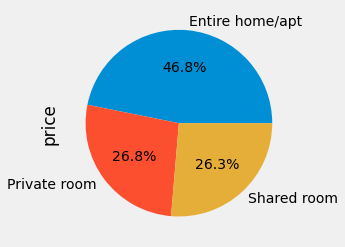

In [71]:
df1.plot(kind='pie',legend=None,subplots=True,autopct='%1.1f%%')

In [72]:
data['room_type'].value_counts()

Entire home/apt    14126
Private room        3380
Shared room           63
Name: room_type, dtype: int64

In [73]:
data.columns

Index(['room_id', 'host_id', 'room_type', 'city', 'neighborhood', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'name',
       'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

In [74]:
data['neighborhood'].value_counts()

De Baarsjes / Oud West                    3160
De Pijp / Rivierenbuurt                   2235
Centrum West                              1976
Centrum Oost                              1593
Noord-West / Noord-Midden                 1385
Westerpark                                1356
Oud Oost                                  1126
Bos en Lommer                              926
Oostelijk Havengebied / Indische Buurt     875
Oud Noord                                  458
Watergraafsmeer                            432
Ijburg / Eiland Zeeburg                    357
Slotervaart                                331
Buitenveldert / Zuidas                     241
Noord West                                 233
Noord Oost                                 214
Geuzenveld / Slotermeer                    183
Osdorp                                     156
De Aker / Nieuw Sloten                     104
Bijlmer Oost                                91
Bijlmer Centrum                             85
Gaasperdam / 

In [75]:
data['city'].value_counts()

Amsterdam    17569
Name: city, dtype: int64

In [76]:
data['reviews'].value_counts()

0      2789
1      1425
2      1184
3      1052
4       873
       ... 
240       1
177       1
191       1
447       1
281       1
Name: reviews, Length: 278, dtype: int64

In [77]:
#3 bedroom satisfactions

In [78]:
fii=data['bedrooms']==3

In [79]:
data_3bed=data[fii]

In [80]:
data_3bed['overall_satisfaction'].value_counts()

4.0    657
5.0    515
4.5    266
3.5      5
2.5      1
Name: overall_satisfaction, dtype: int64

In [81]:
#2 bedroom satisfactions

In [82]:
fii2=data['bedrooms']==2

In [83]:
data_2bed=data[fii2]

In [84]:
data_2bed['overall_satisfaction'].value_counts()

5.0    1787
4.0    1614
4.5    1033
3.5      16
3.0       6
Name: overall_satisfaction, dtype: int64

In [85]:
#relationship between bedrooms and  average price

In [86]:
df2=pd.pivot_table(data,index='bedrooms',values='price',aggfunc='mean')
df2

,price
bedrooms,
1.0,135.482929
2.0,203.321589
3.0,255.014543
4.0,302.268499
5.0,451.677419
6.0,503.000000
7.0,914.500000
8.0,467.666667
9.0,689.500000


array([<AxesSubplot:title={'center':'price'}, xlabel='bedrooms'>],
      dtype=object)

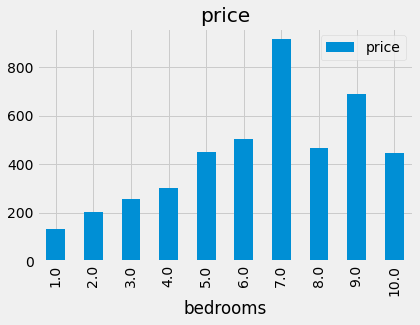

In [87]:
df2.plot(kind='bar',subplots=True)

In [88]:
#houses withe price range of 150-180

In [89]:
fii3=data[(data.price>=150) & (data.price<=180)]

In [90]:
fii3['overall_satisfaction'].value_counts()

5.0    1552
4.0    1208
4.5     836
3.5      12
3.0       4
Name: overall_satisfaction, dtype: int64

In [91]:
#distribution of total bedrooms by percentage

In [92]:
df5=data['bedrooms'].value_counts()

In [93]:
bed_total=data['bedrooms'].sum()

In [94]:
def prop(df):
    return (df*100)/bed_total

df6=df5.apply(prop)

In [95]:
df6

1.0     41.451029
2.0     16.638662
3.0      5.391882
4.0      1.766178
5.0      0.231507
6.0      0.070946
10.0     0.018670
7.0      0.014936
8.0      0.011202
9.0      0.007468
Name: bedrooms, dtype: float64

array([<AxesSubplot:title={'center':'bedrooms'}>], dtype=object)

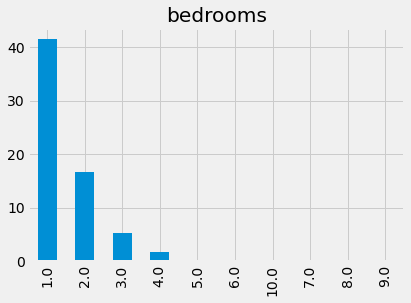

In [96]:
df6.plot(kind='bar',subplots=True)

In [97]:
data

,room_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,location
0,10176931,49180562,Shared room,Amsterdam,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,46718394,Shared room,Amsterdam,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,10346595,Shared room,Amsterdam,Watergraafsmeer,1,4.0,3,1.0,132.0,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,8685430,Shared room,Amsterdam,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,70191803,Shared room,Amsterdam,De Baarsjes / Oud West,1,4.0,2,1.0,93.0,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,17789893,47501089,Private room,Amsterdam,Bijlmer Centrum,10,5.0,3,1.0,32.0,"1-3 pers. Cozy Rm AFAS Live, ArenA, ZIGGODOME",2017-07-22 16:05:14.158963,52.319794,4.955638,0101000020E6100000684293C492D2134080BA8102EF28...
18719,16877166,67093870,Private room,Amsterdam,Bijlmer Centrum,6,5.0,4,1.0,24.0,"Modern Room by Arena, ZIGGO, HmH",2017-07-22 16:05:14.151986,52.319080,4.954822,0101000020E61000005801BEDBBCD1134062670A9DD728...
18720,19859427,29724632,Private room,Amsterdam,Geuzenveld / Slotermeer,0,4.0,1,1.0,38.0,Private single room,2017-07-22 16:05:14.149610,52.384028,4.838403,0101000020E61000002079E750865A1340C85F5AD42731...
18721,17132164,115156569,Private room,Amsterdam,Centrum West,13,4.5,2,1.0,36.0,City Center studio in Touristic Amsterdam 1,2017-07-22 16:05:14.146183,52.372120,4.890982,0101000020E6100000774CDD955D9013400118CFA0A12F...


In [99]:
data.to_csv(r"C:\Users\qoyyum\Documents\new_air_bnb.csv")